   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

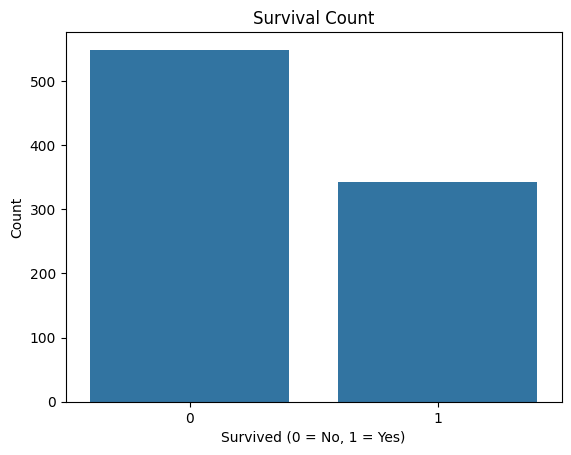

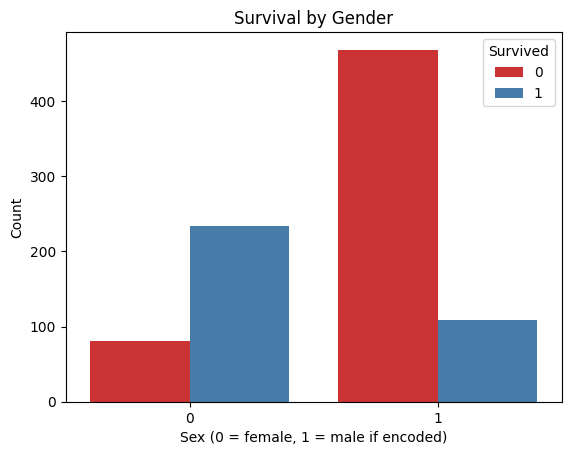

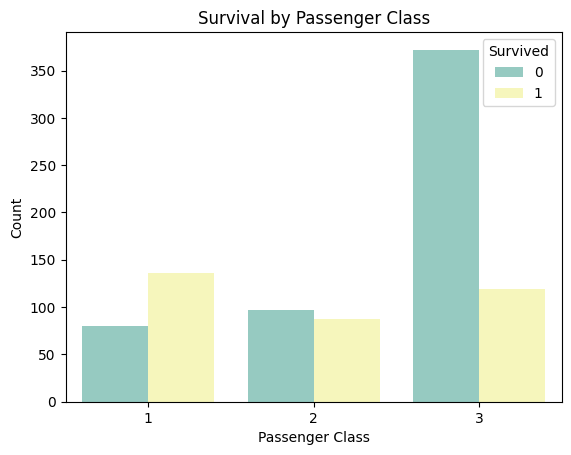

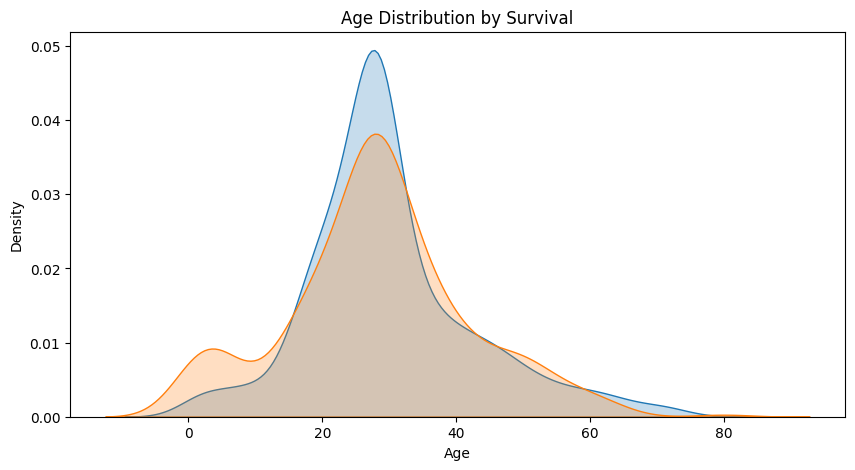

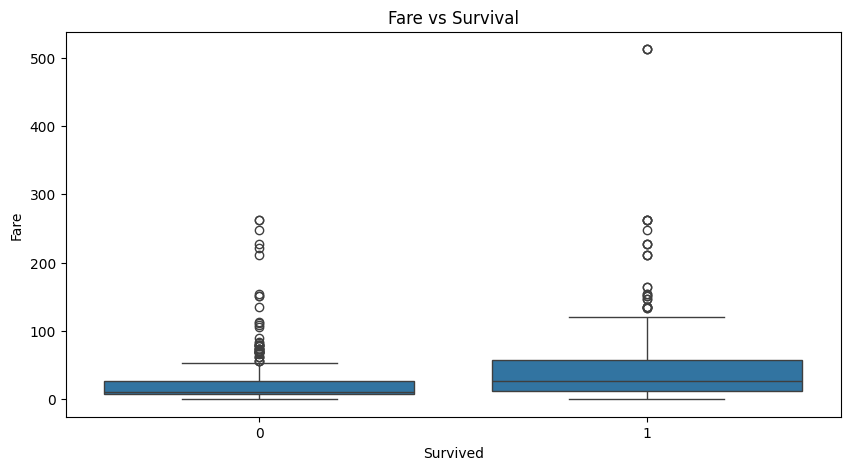

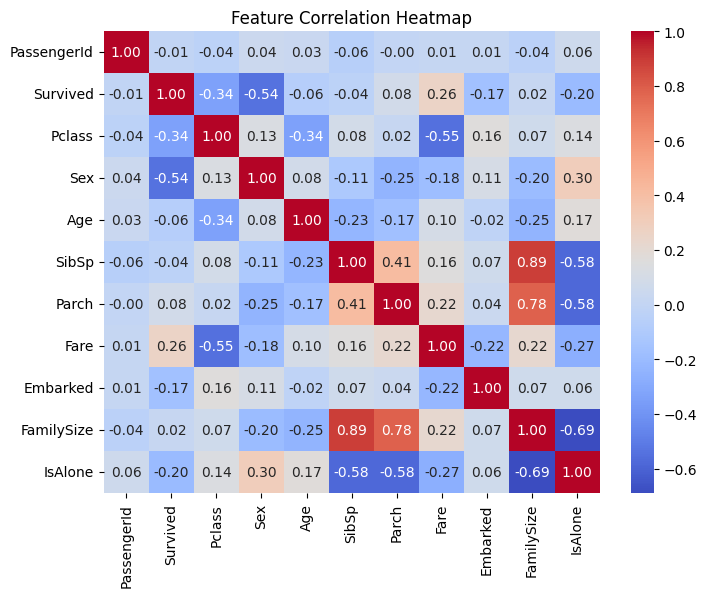

Random Forest CV Accuracy: 0.7879641485275288
Random Forest Test Accuracy: 0.8324022346368715
Logistic Regression CV Accuracy: 0.8019304639022948
Logistic Regression Test Accuracy: 0.7988826815642458
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load dataset
df = pd.read_csv("../data/Titanic-Dataset.csv")

# -----------------------------
# Step 2: Data Analysis & Preprocessing
# -----------------------------
# Quick overview
print(df.head())
print(df.info())
print(df.describe())

# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)  # too many missing values or non-numeric
df.dropna(inplace=True)  # just in case

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Visualisations
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Sex (0 = female, 1 = male if encoded)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Survived']==0]['Age'], label='Did not Survive', fill=True)
sns.kdeplot(df[df['Survived']==1]['Age'], label='Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


# Features & target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Step 3: Model Training
# -----------------------------
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest CV Accuracy:", rf_scores.mean())
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Logistic Regression CV Accuracy:", lr_scores.mean())
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))

# Compare models
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Choose best model (example: Random Forest)
best_model = rf

# Save the model
with open("../model.pkl", "wb") as file:
    pickle.dump(best_model, file)